# Machine learning analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

In [3]:
data_filled = pd.read_excel(r"/home/vildeg/Code/heart_org_missing_filled.xlsx")
data_del =pd.read_excel(r"/home/vildeg/Code/heart_org_missing_deleted.xlsx")
data_OHE = pd.read_excel(r"/home/vildeg/Code/heart_OHE_missing_filled.xlsx")

data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age                        303 non-null int64
Gender                     303 non-null int64
Chest pain type            303 non-null int64
Resting blood pressure     303 non-null int64
Cholesterol                303 non-null int64
Fasting blood sugar        303 non-null int64
Resting ECG                303 non-null int64
Maximum heart rate         303 non-null float64
Exercise enduced angina    303 non-null int64
Oldpeak(ECG)               303 non-null float64
Slope(ECG)                 303 non-null int64
Num. vessels               303 non-null float64
Thalium trace              303 non-null float64
Target                     303 non-null int64
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [4]:
y_f = data_filled['Target']
X_f = data_filled.drop(['Target'], axis = 1)
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size = 0.2, random_state = 0)

#print(X_f_train)
feature_f_names = list(data_filled.columns)
feature_f_names.remove('Target')
target_f_names = 'Target'


## Supervised learning

In [5]:
h_l_sizes = (2,5) #2 layers, med 5 noder.
mlp_classifier = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=h_l_sizes, random_state=1, max_iter=10000)
mlp_classifier.fit(X_f_train, y_f_train)
score = mlp_classifier.score( X_f_test, y_f_test)
print(score)

0.8524590163934426


### Deciding on arcitechture (adam)

In [6]:
score = []
hidden_layer_sizes = []

for i in range(1,10):
    for j in range (2,10):
        hidden_layer_sizes.append((i,j))
        mlp_classifier = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(i,j), random_state=1, max_iter=10000)
        mlp_classifier.fit(X_f_train, y_f_train)
        score.append(mlp_classifier.score( X_f_test, y_f_test))
        

(5, 5)  :  0.8852459016393442
(7, 6)  :  0.8688524590163934
(7, 7)  :  0.8688524590163934
(9, 5)  :  0.8688524590163934
(2, 5)  :  0.8524590163934426
(3, 6)  :  0.8524590163934426
(6, 5)  :  0.8524590163934426
(6, 7)  :  0.8524590163934426
(8, 5)  :  0.8524590163934426
(8, 6)  :  0.8524590163934426
(5, 4)  :  0.8360655737704918
(6, 3)  :  0.8360655737704918
(7, 3)  :  0.8360655737704918
(8, 8)  :  0.8360655737704918
(9, 6)  :  0.8360655737704918


<BarContainer object of 15 artists>

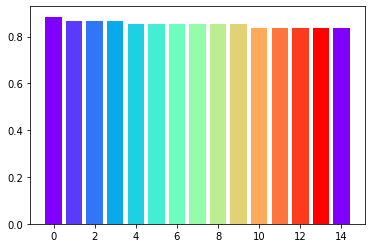

In [7]:
colors = rainbow(np.linspace(0, 1, int(len(score)/5)))

top_5 = (sorted(range(len(score)), key=lambda i: score[i], reverse = True)[:15])
top_score = []
top_size = []
for i in top_5 :
    top_score.append(score[i])
    top_size.append(hidden_layer_sizes[i])
    print(hidden_layer_sizes[i], " : ", score[i])
plt.bar(range(len(top_score)),top_score, color = colors)

### Deciding on arcitechture(sgd)

In [8]:
score = []
hidden_layer_sizes = []

for i in range(1,10):
    for j in range (2,10):
        hidden_layer_sizes.append((i,j))
        mlp_classifier = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(i,j), random_state=1, max_iter=10000)
        mlp_classifier.fit(X_f_train, y_f_train)
        score.append(mlp_classifier.score( X_f_test, y_f_test))
        

(9, 4)  :  0.7377049180327869
(5, 7)  :  0.7213114754098361
(7, 9)  :  0.7213114754098361
(9, 6)  :  0.7213114754098361
(3, 9)  :  0.7049180327868853
(6, 8)  :  0.7049180327868853
(8, 7)  :  0.7049180327868853
(8, 9)  :  0.7049180327868853
(3, 2)  :  0.6885245901639344
(3, 8)  :  0.6885245901639344
(5, 6)  :  0.6885245901639344
(7, 4)  :  0.6885245901639344
(8, 5)  :  0.6885245901639344
(5, 4)  :  0.6557377049180327
(7, 6)  :  0.6557377049180327


<BarContainer object of 15 artists>

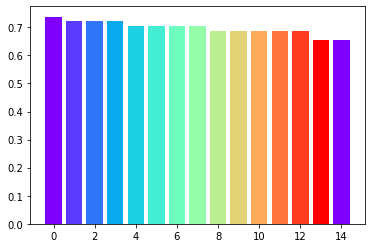

In [9]:
colors = rainbow(np.linspace(0, 1, int(len(score)/5)))

top_5 = (sorted(range(len(score)), key=lambda i: score[i], reverse = True)[:15])
top_score = []
top_size = []
for i in top_5 :
    top_score.append(score[i])
    top_size.append(hidden_layer_sizes[i])
    print(hidden_layer_sizes[i], " : ", score[i])
plt.bar(range(len(top_score)),top_score, color = colors)

In [10]:
scores_lr = []
A = 0.001
alphas = []
for i in range(500):
    mlp_classifier = MLPClassifier(solver='sgd', learning_rate = 'adaptive',learning_rate_init = A,hidden_layer_sizes=(9,4), random_state=1, max_iter=10000)
    alphas.append(A)
    A += 0.001
    mlp_classifier.fit(X_f_train, y_f_train)
    scores_lr.append(mlp_classifier.score( X_f_test, y_f_test))

0.002  :  0.7377049180327869
0.001  :  0.7213114754098361
0.004  :  0.5573770491803278
0.005  :  0.5573770491803278
0.006  :  0.5573770491803278
0.007  :  0.5573770491803278
0.008  :  0.5573770491803278
0.009000000000000001  :  0.5573770491803278
0.010000000000000002  :  0.5573770491803278
0.011000000000000003  :  0.5573770491803278
0.012000000000000004  :  0.5573770491803278
0.013000000000000005  :  0.5573770491803278
0.014000000000000005  :  0.5573770491803278
0.015000000000000006  :  0.5573770491803278
0.016000000000000007  :  0.5573770491803278


<BarContainer object of 15 artists>

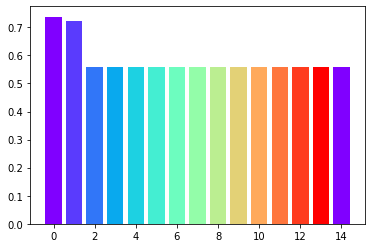

In [11]:
top_5 = (sorted(range(len(scores_lr)), key=lambda i: scores_lr[i], reverse = True)[:15])
top_score = []
top_size = []
for i in top_5 :
    top_score.append(scores_lr[i])
    top_size.append(alphas[i])
    print(alphas[i], " : ", scores_lr[i])
plt.bar(range(len(top_score)),top_score, color = colors)

### Deciding on arcitechture(lbfg)

In [12]:
score = []
hidden_layer_sizes = []

for i in range(1,10):
    for j in range (2,10):
        hidden_layer_sizes.append((i,j))
        mlp_classifier = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(i,j), random_state=1, max_iter=10000)
        mlp_classifier.fit(X_f_train, y_f_train)
        score.append(mlp_classifier.score( X_f_test, y_f_test))
        

(3, 2)  :  0.8852459016393442
(5, 5)  :  0.8852459016393442
(9, 7)  :  0.8852459016393442
(8, 8)  :  0.7868852459016393
(7, 5)  :  0.7704918032786885
(6, 9)  :  0.7213114754098361
(4, 8)  :  0.7049180327868853
(9, 4)  :  0.7049180327868853
(3, 6)  :  0.6885245901639344
(8, 4)  :  0.639344262295082
(4, 3)  :  0.5901639344262295
(1, 2)  :  0.5573770491803278
(1, 3)  :  0.5573770491803278
(1, 4)  :  0.5573770491803278
(1, 5)  :  0.5573770491803278


<BarContainer object of 15 artists>

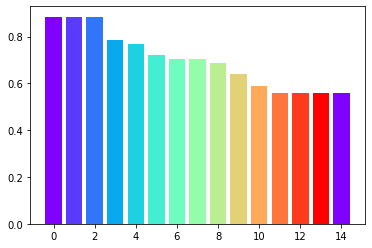

In [13]:
colors = rainbow(np.linspace(0, 1, int(len(score)/5)))

top_5 = (sorted(range(len(score)), key=lambda i: score[i], reverse = True)[:15])
top_score = []
top_size = []
for i in top_5 :
    top_score.append(score[i])
    top_size.append(hidden_layer_sizes[i])
    print(hidden_layer_sizes[i], " : ", score[i])
plt.bar(range(len(top_score)),top_score, color = colors)

## Learning rates

In [14]:
scores_lr = []
A = 0.0038
alphas = []
for i in range(500):
    mlp_classifier = MLPClassifier(solver='lbfgs', alpha=A,hidden_layer_sizes=(9,4), random_state=1, max_iter=10000)
    alphas.append(A)
    A += 1e-5
    mlp_classifier.fit(X_f_train, y_f_train)
    scores_lr.append(mlp_classifier.score( X_f_test, y_f_test))

0.0041499999999999905  :  0.9016393442622951
0.004839999999999962  :  0.9016393442622951
0.0054999999999999355  :  0.9016393442622951
0.007209999999999866  :  0.9016393442622951
0.004019999999999996  :  0.8852459016393442
0.004049999999999995  :  0.8852459016393442
0.00415999999999999  :  0.8852459016393442
0.004239999999999987  :  0.8852459016393442
0.004249999999999986  :  0.8852459016393442
0.004319999999999984  :  0.8852459016393442
0.004329999999999983  :  0.8852459016393442
0.00439999999999998  :  0.8852459016393442
0.004669999999999969  :  0.8852459016393442
0.004719999999999967  :  0.8852459016393442
0.004789999999999964  :  0.8852459016393442


<BarContainer object of 15 artists>

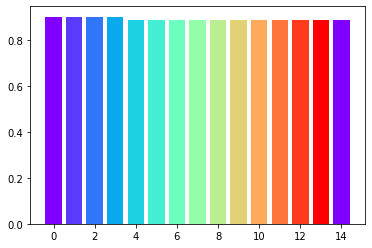

In [15]:
top_5 = (sorted(range(len(scores_lr)), key=lambda i: scores_lr[i], reverse = True)[:15])
top_score = []
top_size = []
for i in top_5 :
    top_score.append(scores_lr[i])
    top_size.append(alphas[i])
    print(alphas[i], " : ", scores_lr[i])
plt.bar(range(len(top_score)),top_score, color = colors)

## Hyperparameters


In [16]:
solver = 'lbfgs'
lr_init = 0.0001
alpha_ = 0.0041
hidden_size = (9,4)

In [18]:
mlp_classifier = MLPClassifier(solver='lbfgs', alpha= alpha_,hidden_layer_sizes= hidden_size, random_state=1, max_iter=10000)
mlp_classifier.fit(X_f_train, y_f_train)
print(mlp_classifier.score( X_f_test, y_f_test))

0.8688524590163934


# Compare all modes